In [135]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
import string
import nltk
from wordcloud import WordCloud
from collections import Counter

In [136]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kiahm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
genshinCN_reviews = pd.read_csv('GenshinCN-AppStore-Reviews.csv')
genshinCN_reviews.head()

,date,review,rating,isEdited,userName,title
0,2023-12-24 12:26:18,我是2.1入坑的 算是玩了两年半了吧 一开始是看见瑶皮肤是原神建模师做的 就对原神非常感兴趣...,4,False,枭呆,有点繁琐
1,2024-05-01 09:03:20,原神是我第一个玩二次元开放大世界的游戏，我真的很喜欢，精美的剧情和角色塑造都很棒。 但是我想...,5,False,整体不错！！,整体不错
2,2023-11-02 12:58:06,开服玩家，渊下宫那会儿太忙弃坑过几个月，喜欢的角色即便早已跟不上版本我也渐渐把他们收集全，拉...,3,False,致一酱,最终还是没坚持下去
3,2023-10-22 16:18:39,总体来说还是很不错，无论是音乐还是画面，剧情也很用心。3.8入坑，先体验的蒙德、璃月、枫丹，...,4,False,本人我诚挚奉劝诸位,客观评价
4,2024-02-14 09:17:23,4.0入坑的，刚入坑时觉得超好玩的，一天几个小时都不会累。随着等级慢慢提升，我对原神的认知越...,3,False,you0011,真的有点坚持不了


In [138]:
genshinUS_reviews = pd.read_csv('GenshinUS-AppStore-Reviews.csv')
genshinUS_reviews.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2024-03-14 21:13:53,If your into anything action related or into g...,4,False,Paimon ✨,Beautiful (also mid) 😌,NaN
1,2024-03-12 23:53:32,I’ve been playing genshin off and on for years...,5,False,Dreamercorngirl,Addiction unlocked✅,NaN
2,2021-07-29 20:38:39,this game is the best game I’ve ever downloade...,5,False,✨Paimon✨,best game in the universe! <3,NaN
3,2020-10-12 17:38:12,I’m one of those people who Judges a game by i...,5,False,... well then.,Surprised,NaN
4,2021-02-18 13:20:18,This game is insane. I’ve played now for a tot...,5,False,CraftiBadger,AAA Title for free,NaN


Stopword Removal

In [139]:
'''
stop=set(stopwords.words("english"))

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

genshinUS_reviews['review'] = genshinUS_reviews['review'].apply(remove_stopword)
'''

'\nstop=set(stopwords.words("english"))\n\ndef remove_stopword(text):\n   text=[word.lower() for word in text.split() if word.lower() not in stop]\n   return " ".join(text)\n\ngenshinUS_reviews[\'review\'] = genshinUS_reviews[\'review\'].apply(remove_stopword)\n'

Exploratory Data Analysis (EDA)

In [140]:
print(genshinUS_reviews.info())
print(genshinUS_reviews.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               2000 non-null   object
 1   review             2000 non-null   object
 2   rating             2000 non-null   int64 
 3   isEdited           2000 non-null   bool  
 4   userName           2000 non-null   object
 5   title              2000 non-null   object
 6   developerResponse  15 non-null     object
dtypes: bool(1), int64(1), object(5)
memory usage: 95.8+ KB
None
           rating
count  2000.00000
mean      3.88950
std       1.44891
min       1.00000
25%       3.00000
50%       5.00000
75%       5.00000
max       5.00000


In [141]:
print(genshinUS_reviews.dtypes)

date                 object
review               object
rating                int64
isEdited               bool
userName             object
title                object
developerResponse    object
dtype: object


In [142]:
# Check for missing values
genshinUS_reviews.isna().sum()

date                    0
review                  0
rating                  0
isEdited                0
userName                0
title                   0
developerResponse    1985
dtype: int64

In [143]:
genshinUS_reviews = genshinUS_reviews.drop('developerResponse', axis = 1)
genshinUS_reviews.head()

,date,review,rating,isEdited,userName,title
0,2024-03-14 21:13:53,If your into anything action related or into g...,4,False,Paimon ✨,Beautiful (also mid) 😌
1,2024-03-12 23:53:32,I’ve been playing genshin off and on for years...,5,False,Dreamercorngirl,Addiction unlocked✅
2,2021-07-29 20:38:39,this game is the best game I’ve ever downloade...,5,False,✨Paimon✨,best game in the universe! <3
3,2020-10-12 17:38:12,I’m one of those people who Judges a game by i...,5,False,... well then.,Surprised
4,2021-02-18 13:20:18,This game is insane. I’ve played now for a tot...,5,False,CraftiBadger,AAA Title for free


In [144]:
# Convert date column to datetime
genshinUS_reviews['date'] = pd.to_datetime(genshinUS_reviews['date'])

In [145]:
# Basic statistics for ratings
genshinUS_reviews['rating'].describe()

count    2000.00000
mean        3.88950
std         1.44891
min         1.00000
25%         3.00000
50%         5.00000
75%         5.00000
max         5.00000
Name: rating, dtype: float64

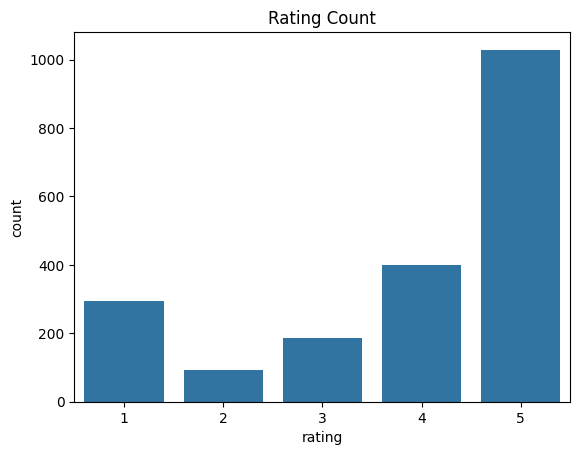

In [146]:
sns.countplot(genshinUS_reviews, x='rating')
plt.title('Rating Count')
plt.show()

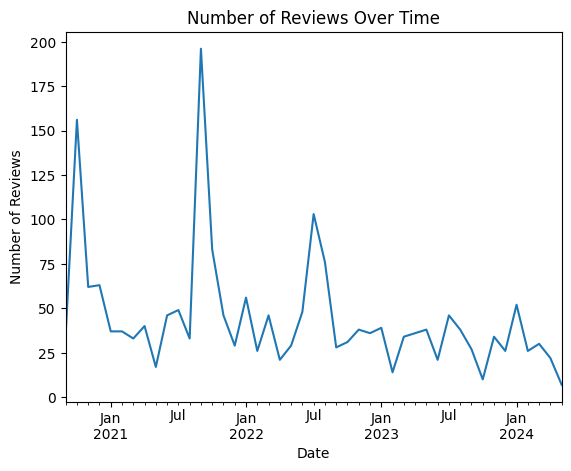

In [147]:
# Distribution of reviews over time
genshinUS_reviews.set_index('date').resample('M').count()['review'].plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()

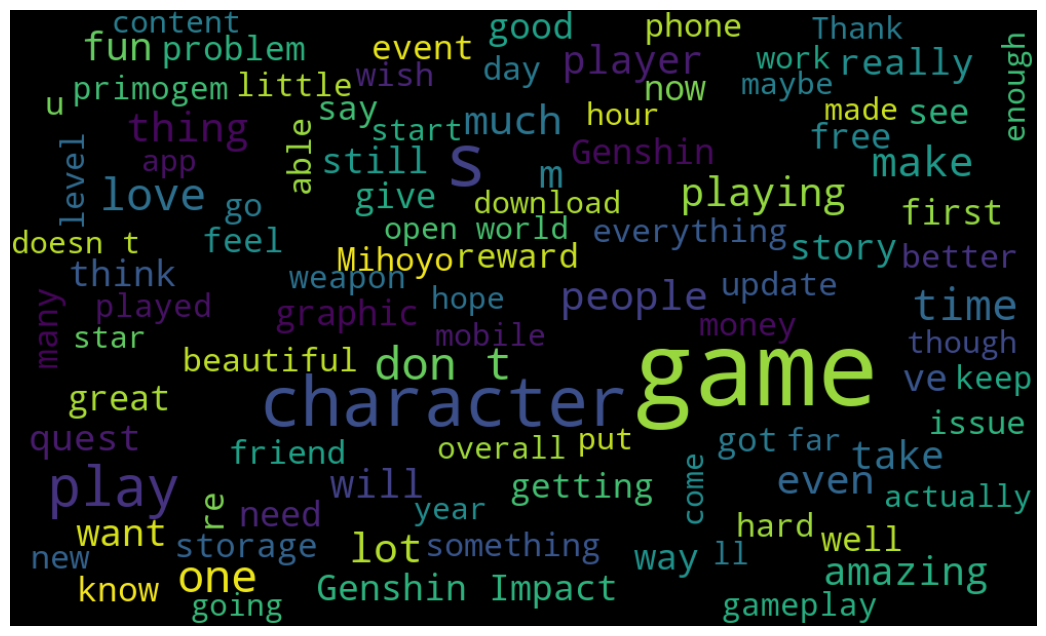

In [148]:
txt = ' '.join(rev for rev in genshinUS_reviews.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [149]:
# WordCloud of Each Sentiment Review Text
high = genshinUS_reviews[genshinUS_reviews['rating'] >= 3]
low = genshinUS_reviews[genshinUS_reviews['rating'] <= 2]

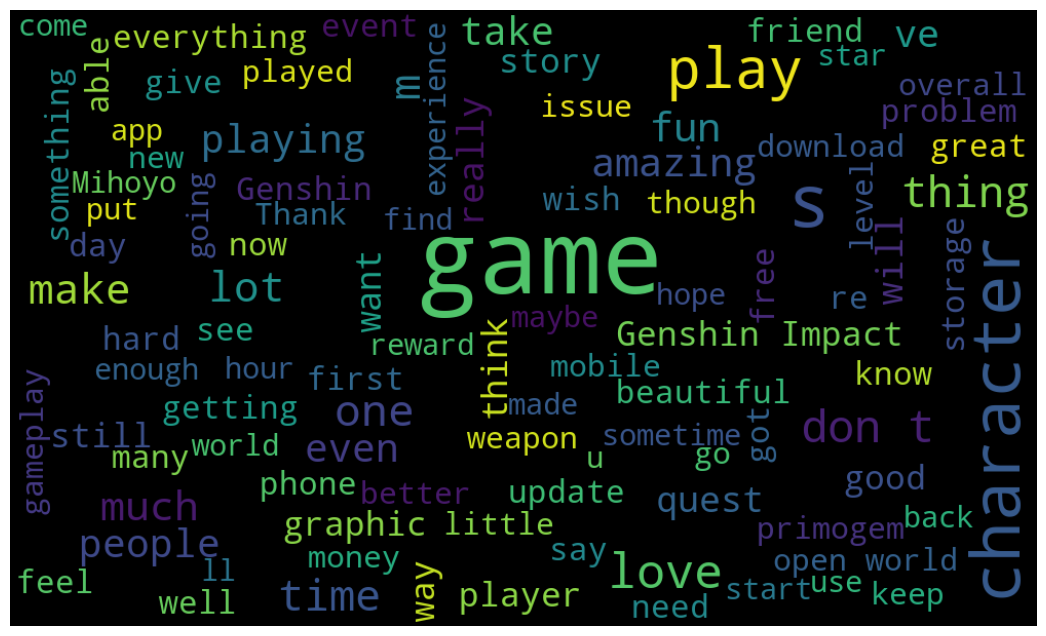

In [150]:
# Postive sentiment wordcloud
txt = ' '.join(rev for rev in high.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

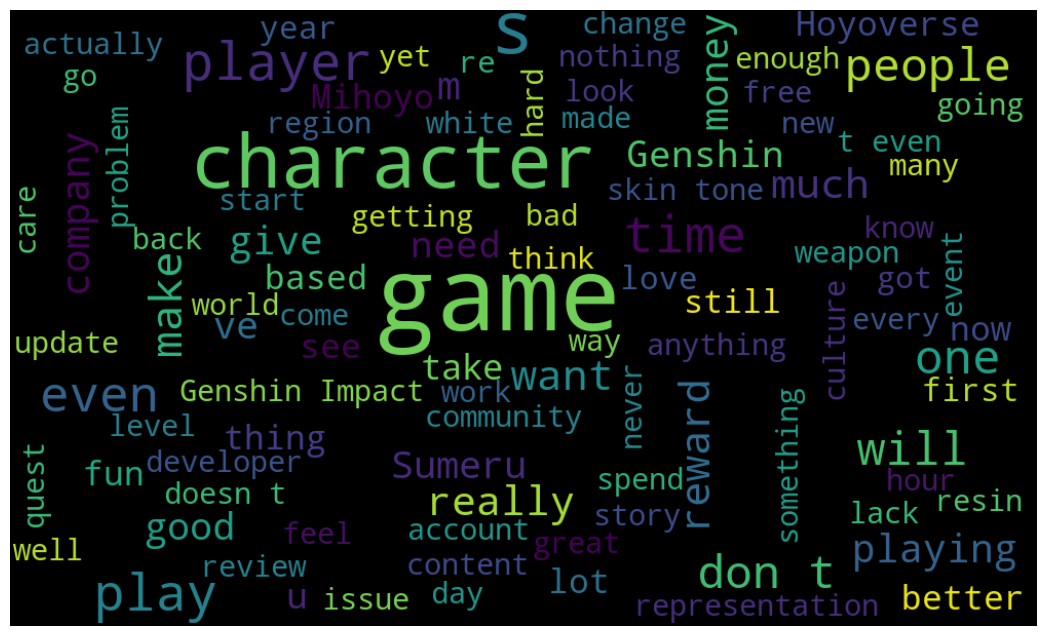

In [151]:
# Negative sentiment wordcloud
txt = ' '.join(rev for rev in low.review)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

<Axes: xlabel='Num_word_review', ylabel='Count'>

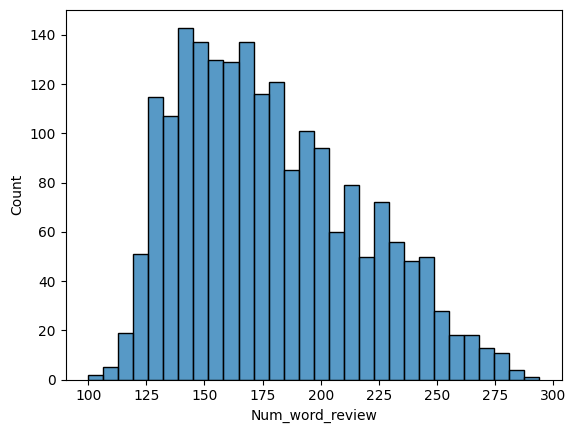

In [152]:
# Distribution of num of reviews
USreview_copy = genshinUS_reviews.copy()
USreview_copy['Num_word_review'] = USreview_copy['review'].apply(lambda x:len(str(x).split()))

sns.histplot(data=USreview_copy, x = 'Num_word_review', bins=30)

Most reviews contain about 130 to 185 words

In [153]:
# Dist of words in all reviews
USreview_copy['temp_list'] = USreview_copy['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in USreview_copy['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,14009
1,and,11168
2,to,10467
3,I,9901
4,a,7783
5,is,6244
6,of,5715
7,game,5644
8,it,4770
9,you,4632


We see that the most common words are stopwords. Hence we will need to remove them.

Data Preprocessing

In [154]:
def clean(raw):
    # Remove hyperlinks and markup
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

def remove_num(texts):
   output = re.sub(r'\d+', '', texts)
   return output

def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string 

def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',','))
    return final

In [159]:
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
stop=set(stopwords.words("english"))

def remove_stopword(text):
   text=[word.lower() for word in text.split() if word.lower() not in stop]
   return " ".join(text)

def Stemming(text):
   stem=[]
   stopword = stopwords.words('english')
   snowball_stemmer = SnowballStemmer('english')
   word_tokens = nltk.word_tokenize(text)
   stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
   stem=' '.join(stemmed_word)
   return stem

In [160]:
def preprocessing(df,col):
    df[col] = df[col].apply(clean)
    df[col] = df[col].apply(deEmojify)
    df[col] = df[col].str.lower()
    df[col] = df[col].apply(remove_num)
    df[col] = df[col].apply(remove_symbols)
    df[col] = df[col].apply(remove_punctuation)
    df[col] = df[col].apply(remove_stopword)
    df[col] = df[col].apply(unify_whitespaces)
    df[col] = df[col].apply(Stemming)


In [164]:
preprocessing(USreview_copy, 'review')

In [165]:
USreview_copy[['review']].head()

,review
0,anyth action relat game quest whatev genshin r...
1,play genshin year first much fan got back real...
2,game best game ever download great open word g...
3,one peopl judg game video screenshot price pla...
4,game insan play total day accord hoyolab easil...


In [166]:
# Dist of words in all reviews
USreview_copy['temp_list'] = USreview_copy['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in USreview_copy['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,game,8333
1,charact,3372
2,play,3209
3,get,2905
4,like,2010
5,realli,1405
6,time,1313
7,love,1306
8,genshin,1281
9,one,1200


C:\Users\kiahm\AppData\Local\Temp\ipykernel_32276\3260963195.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))
C:\Users\kiahm\AppData\Local\Temp\ipykernel_32276\3260963195.py:4: UserWarning: 
The palette list has fewer values (8) than needed (20) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))


<Axes: xlabel='count', ylabel='Common_words'>

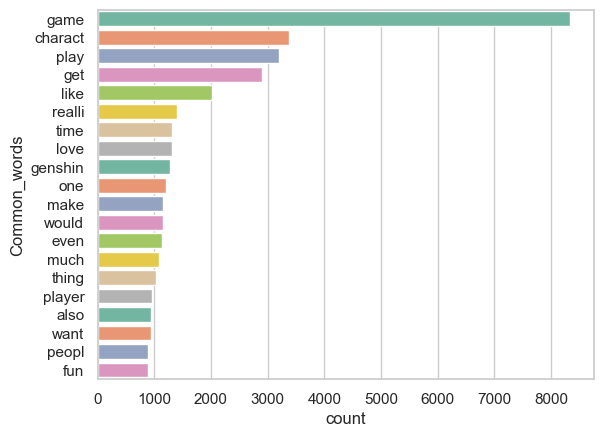

In [174]:
# Plot them
sns.set_theme(style="whitegrid")
sns.color_palette("husl", 8)
sns.barplot(x="count", y="Common_words", data=temp, palette=sns.color_palette("Set2"))